In [1]:
# George Miloshevich 2022

import os, sys
import pickle
from pathlib import Path

from functools import partial # allows us to create a function with arguments passed

# North Atlantic Europe: France
folder = Path('./xforanalogs/NA24by48/global_logit/yrs100/interT15')  # The name of the folder where the analogs have been stored
#folder = Path('./xforanalogs/ZGonlyNA24by48/Z16/yrs100/interT15fw20.1.20ZGskip2')
folder_long = Path('./xforanalogs/NA24by48/global_logit/yrs8000/interT15') # The name of the folder where the full time series are stored
filename = './Images/NAE_France' # Where to store eventual image
# North Hemisphere: France
#folder = Path('./xforanalogs/NH24by128/global_logit/yrs100/interT15')
#folder_long = Path('./xforanalogs/NA24by48/global_logit/yrs8000/interT15') # The name of the folder where the full time series are stored
#filename = './Images/NH_France' # Where to store eventual image

# North Atlantic Europe: Scandinavia
#folder = Path('./xforanalogs/ZGonlyNA24by48/Scandinavia/global_logit/yrs100/interT15')   # The name of the folder where the analogs have been stored
#folder_long = Path('./xforanalogs/ZGonlyNA24by48/Scandinavia/global_logit/yrs8000/interT15') # The name of the folder where the full time series are stored
#filename = './Images/NAE_Scandinavia' # Where to store eventual image

# North Hemisphere
#folder = Path('./xforanalogs/ZGonlyNH24by128/Scandinavia/global_logit/yrs100/interT15')   # The name of the folder where the analogs have been stored
#folder_long = Path('./xforanalogs/ZGonlyNA24by48/Scandinavia/global_logit/yrs8000/interT15') # The name of the folder where the full time series are stored
#filename = './Images/NH_Scandinavia' # Where to store eventual image

import logging
from colorama import Fore # support colored output in terminal
from colorama import Style
if __name__ == '__main__':
    logger = logging.getLogger()
    logger.handlers = [logging.StreamHandler(sys.stdout)]
else:
    logger = logging.getLogger(__name__)
logger.level = logging.INFO     

import importlib.util
def module_from_file(module_name, file_path): #The code that imports the file which originated the training with all the instructions
            spec = importlib.util.spec_from_file_location(module_name, file_path)
            module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(module)
            return module

from importlib import import_module
#foo = import_module(fold_folder+'/Funs.py', package=None)


#folder = './xforanalogs/NA24by48/Z8/yrs500/interT15fw20.1.20lrs4'
foo = module_from_file("foo", f'{folder}/Funs.py')
import pickle
import random as rd  
from scipy.stats import norm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.metrics import log_loss

tff = foo.tff # tensorflow routines 
ut = foo.ut # utilities
ln = foo.ln #Learn2_new.py
print(ln)
print(ut)
print(tff)
import committor_analogue as ca
print(ca)
ca.tff = tff
ca.ut = ut
ca.ln = ln


import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy_plots as cplt

Note: detected 192 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
Note: NumExpr detected 192 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


2022-12-13 08:35:02.125054: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


path_to_ERA = '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe'/ERA/
Trying to import basemap
In this environment you cannot import Basemap
Trying to import cartopy
Trying to import basemap
In this environment you cannot import Basemap
Trying to import cartopy
Successfully imported cartopy
Successfully imported cartopy
==Checking GPU==
From xforanalogs/NA24by48/global_logit/yrs100/interT15/Funs.py:45: is_gpu_available (from tensorflow.python.framework.test_util) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
==Checking CUDA==
<module 'PLASIM.Learn2_new' from '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/Learn2_new.py'>
<module 'ERA.utilities' from '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/ERA/utilities.py'>
<module 'ERA.TF_Fields' from '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/ERA/TF_Fields.py'>
path_to_ERA = '/ClimateDynamics/MediumSpace/Clim

2022-12-13 08:35:05.679764: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 08:35:05.749199: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-12-13 08:35:06.449621: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-13 08:35:06.449708: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (platinum1): /proc/driver/nvidia/version does not exist
2022-12-13 08:35:06.449744: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices n

<module 'committor_analogue' from '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/VAE/committor_analogue.py'>


## Serial code

In [2]:
int_vector = np.vectorize(np.int_)

def TrajOnePoint(day, nn, n_Traj, numsteps, Markov_step, Matr_tr,n_days): # a day implies the temporal coordinates in days of the input from the 0-th year of the 1000 year long dataset
    """ Compute `n_Traj` trajectories starting from `day` that take `numsteps` steps
    Args:
        day (_int_):            day in the validation set where the Markov chain will start
        nn (_int_):             number of nearest neighbors to look for
        n_Traj (_int array_):         Number of MC samples that start from the same day (number of trajectories).
        numsteps (_int array_):       numbe of steps to take in each trajectory
        Markov_step (_int_):    step in the Markov chain (how many days)
        Matr_tr (_ndarray_):    T matrix inside the training set
        n_days (_int_):         number of days in a season
    """
    res = np.zeros((len(n_Traj),len(numsteps)))
    Matr_tr_trial = 0
    app_draw_index = -1 # This keeps track of how many times we drew random analogs at each Markov step (if there are not enough analogs we draw again)
    app_draw_index_traj = 0
    wrong_index = 0 # This checks that during input or execution we were always working with indecies that exist in the considered matrices and we don't go below or above
    if (day >= Matr_tr.shape[0]) or (day < 0): # We don't allow inputs that are outside of the range of Matr_va. 
        #print("day > Matr_va.shape[0]")
        wrong_index = 1 # manual debugging (unfortunately numba does not capture this)
        print("We don't allow inputs that are outside of the range of Matr_va")
        for l_1 in n_Traj:
            for l_2 in numsteps:
                res[l_1][l_2] = np.nan # we simply  don't have corresponding index
    else:
        #print("day <= Matr_va.shape[0]")
        app_draw_index_traj = 0
        for i in n_Traj:   
            s = day # We initialize trajectory at the first day
            res[i][0] = s
            #print("output: ", day,app,s, Matr_va.shape)
            if (s >= Matr_tr.shape[0]) or (s < 0):
                print("Index s = ",s, " is outside the range of Matr_tr")
                wrong_index = 1
            for j in numsteps[1:]: 
                #if (Matr_tr[s][nn] == Matr_tr.shape[0]):
                #    print("Trajectory", i, ", Iteration ", j, ". There are not enough analogs for this amount of neighbors (likely got removed when trimming moving average or self analogs)")
                Matr_tr_trial = Matr_tr.shape[0]
                app_draw_index = -1 # we set it to -1 because the first trial will increment by default even if it is successful
                while Matr_tr_trial == Matr_tr.shape[0]: # keep drawing until appropriate analogs are found
                    app = rd.randint(0,nn-1) #analogue selection
                    Matr_tr_trial =  Matr_tr[s][app]
                    app_draw_index += 1 
                if Matr_tr_trial == -1:
                    wrong_index = 1
                    print("Iteration ", j,"We have accidentally accessed -1 index which means there is a problem with Matr_tr")
                if Matr_tr_trial%n_days >= n_days-Markov_step:
                    wrong_index = 1
                    print("Iteration ", j,"We have accessed analog that has no next day, which could jump us across a year: Matr_tr[s][app] = ", Matr_tr_trial)
                    print("this happens for s =", s, " and app = ",app)
                if (Matr_tr_trial >= Matr_tr.shape[0]) or (Matr_tr[s][app] < 0):
                    print("Iteration ", j," ,Index s =", s, " and app =  ", app, " gives Matr_tr[s][app] = ", Matr_tr_trial)
                    print("is outside the range of Matr_tr which is ", Matr_tr.shape[0], " The day maps to  Matr_tr[s][app]%n_days = ",  Matr_tr_trial%n_days, " calendar day")
                    print("This is likely because there were not enough analogs after moving average was imposed. So we take random state")
                    wrong_index = 1
                s = Matr_tr[s][app] + Markov_step         #analog state s is evolved in time
                res[i][j] = s
                if (s >= Matr_tr.shape[0]) or (s < 0):
                    print("Index s after adding Markov_step = ",s, " is outside the range of Matr_tr which is ", Matr_tr.shape[0])
                    wrong_index = 1
                app_draw_index_traj += app_draw_index
        if app_draw_index_traj > 0:
            print("day", day, " had ", app_draw_index_traj , " unsuccessful analog draws")
        if wrong_index == 1:
            print("Somewhere inside the code there was an input outside of the range of matrices/vectors")
            for i in n_Traj:
                for j in numsteps:
                    res[l_1][l_2] = np.nan # we simply  don't have the corresponding index
        return int_vector(res)
        
def DressTrajOnePoint(day, ther,dela, Temp_va, Temp_tr, nn, n_Traj, numsteps, Markov_step, Matr_va, Matr_tr):
    """This function calls TrajOnePoint by selecting the right inputs provided to ca.CommOnePoint()
    """
    n_Traj = np.arange(n_Traj)
    numsteps = np.arange(numsteps) # Note that this overwrites what was prescribed in ca.RunNeighbors(). We want to simulate a day in summer
    res = []
    for day_i in day:
        res.append(TrajOnePoint(day_i, nn, n_Traj, numsteps, Markov_step, Matr_tr,dela)) # we use dela to convey number of days per season 
    return np.array(res)

## Numba powered code

In [3]:
import numba as nb
from numba import jit,guvectorize,set_num_threads
@guvectorize([(nb.int64,nb.int64,nb.int64[:],nb.int64[:],nb.int64,nb.int64[:,:],nb.int64[:,:])],
             '(),(),(n),(m),(),(k,o)->(n,m)',nopython=True,target="parallel") # to enable numba parallelism
def TrajOnePoint(day, nn, n_Traj, numsteps, Markov_step, Matr_tr,res): # a day implies the temporal coordinates in days of the input from the 0-th year of the 1000 year long dataset
    """ Compute `n_Traj` trajectories starting from `day` that take `numsteps` steps
    Args:
        day (_int_):            day in the validation set where the Markov chain will start
        nn (_int_):             number of nearest neighbors to look for
        n_Traj (_int array_):         Number of MC samples that start from the same day (number of trajectories).
        numsteps (_int array_):       numbe of steps to take in each trajectory
        Markov_step (_int_):    step in the Markov chain (how many days)
        Matr_tr (_ndarray_):    T matrix inside the training set
        res (_float_):          stores the committor (return), this is how numba vectorization forces the output to be treated
    """
    app_draw_index = -1 # This keeps track of how many times we drew random analogs at each Markov step (if there are not enough analogs we draw again)
    app_draw_index_traj = 0
    wrong_index = 0 # This checks that during input or execution we were always working with indecies that exist in the considered matrices and we don't go below or above
    if (day >= Matr_tr.shape[0]) or (day < 0): # We don't allow inputs that are outside of the range of Matr_va. 
        #print("day > Matr_va.shape[0]")
        wrong_index = 1 # manual debugging (unfortunately numba does not capture this)
        print("We don't allow inputs that are outside of the range of Matr_va")
        for l_1 in n_Traj:
            for l_2 in numsteps:
                res[l_1][l_2] = np.nan # we simply  don't have corresponding index
    if nn > Matr_tr.shape[1]:
        wrong_index = 1 # manual debugging: use to monitor if we get out of the Matr_tr allowed set
        print("We don't allow inputs that are outside of the range of Matr_va")
    else:
        app_draw_index_traj = 0 # initialize counter
        #print("day <= Matr_va.shape[0]")
        for i in n_Traj:   
            s = day # We initialize trajectory at the first day
            res[i][0] = s
            #print("output: ", day,app,s, Matr_va.shape)
            if (s >= Matr_tr.shape[0]) or (s < 0):
                wrong_index = 1
            for j in numsteps[1:]: 
                #if (Matr_tr[s][nn] == Matr_tr.shape[0]):
                #    print("Trajectory", i, ", Iteration ", j, ". There are not enough analogs for this amount of neighbors (likely got removed when trimming moving average or self analogs)")
                Matr_tr_trial = Matr_tr.shape[0]
                app_draw_index = -1 # we set it to -1 because the first trial will increment by default even if it is successful
                while Matr_tr_trial == Matr_tr.shape[0]: # keep drawing until appropriate analogs are found
                    app = rd.randint(0,nn-1) #analogue selection
                    Matr_tr_trial =  Matr_tr[s][app]
                    app_draw_index += 1 
                if Matr_tr_trial == -1:
                    wrong_index = 1
                    print("Iteration ", j,"We have accidentally accessed -1 index which means there is a problem with Matr_tr")
                if (Matr_tr_trial >= Matr_tr.shape[0]) or (Matr_tr[s][app] < 0):
                    print("Iteration ", j," ,Index s =", s, " and app =  ", app, " gives Matr_tr[s][app] = ", Matr_tr_trial)
                    wrong_index = 1
                s = Matr_tr[s][app] + Markov_step         #analog state s is evolved in time
                res[i][j] = s
                if (s >= Matr_tr.shape[0]) or (s < 0):
                    print("Index s after adding Markov_step = ",s, " is outside the range of Matr_tr which is ", Matr_tr.shape[0])
                    wrong_index = 1
                app_draw_index_traj += app_draw_index
        if app_draw_index_traj > 0:
            print("day", day, " had ", app_draw_index_traj , " unsuccessful analog draws")
        if wrong_index == 1:
            print("Somewhere inside the code there was an input outside of the range of matrices/vectors")
            for i in n_Traj:
                for j in numsteps:
                    res[l_1][l_2] = np.nan # we simply  don't have the corresponding index
        
def DressTrajOnePoint(day, ther,dela, Temp_va, Temp_tr, nn, n_Traj, numsteps, Markov_step, Matr_va, Matr_tr):
    """This function calls TrajOnePoint by selecting the right inputs provided to ca.CommOnePoint()
    """
    n_Traj = np.arange(n_Traj)
    numsteps = np.arange(numsteps) # Note that this overwrites what was prescribed in ca.RunNeighbors(). We want to simulate a day in summer
    return TrajOnePoint(day, nn, n_Traj, numsteps, Markov_step, Matr_tr)

## Prepare kwargs (parameters) of the run

In [4]:
ca.CommOnePoint = DressTrajOnePoint

ln.RunCheckpoints = ca.RunCheckpoints
ln.RunNeighbors = ca.RunNeighbors
ln.RunFolds = ca.RunFolds


#from tensorflow.keras.preprocessing.image import ImageDataGenerator
sys.path.insert(1, '../ERA')
year_permutation = np.load(f'{folder}/year_permutation.npy')
run_vae_kwargs = ut.json2dict(f"{folder}/config.json")

if (ut.keys_exists(run_vae_kwargs, 'label_period_start') and ut.keys_exists(run_vae_kwargs, 'label_period_end')):
    label_period_start = ut.extract_nested(run_vae_kwargs, 'label_period_start')
    label_period_end = ut.extract_nested(run_vae_kwargs, 'label_period_end')
    time_start = ut.extract_nested(run_vae_kwargs, 'time_start')
    time_end = ut.extract_nested(run_vae_kwargs, 'time_end')
threshold = np.array([np.load(f'{folder}/threshold.npy')]) #Threshold defining committor. This parameter I don't need, I shall perhaps transform it into epochs for variational autoencoder 
percent = ut.extract_nested(run_vae_kwargs, 'percent')
nfolds = ut.extract_nested(run_vae_kwargs, 'nfolds')

logger.info(f"{Style.RESET_ALL}")

extra_day=1
if ut.keys_exists(run_vae_kwargs, 'A_weights'):
    A_weights = ut.extract_nested(run_vae_kwargs, 'A_weights')
    if A_weights is not None:
        extra_day = A_weights[0] # We need to see if the labels were interpolated to see how much the algorithm should jump each summer
if extra_day == 3:
    delay = np.arange(6)
else:
    delay = 3*np.arange(6)

T = ut.extract_nested(run_vae_kwargs, 'T')//extra_day
n_days = time_end-time_start-T*extra_day+1   

RunFolds_kwargs_default = ln.get_default_params(ca.RunFolds, recursive=True)
RunFolds_kwargs_default = ut.set_values_recursive(
    RunFolds_kwargs_default, {'num_Traj' : 800, 'chain_step' : extra_day,  'threshold' : threshold, 'removeoutsidemovingwindow' : False,
                                'delay' : n_days, 'neighbors' : [3,5,10,20,40], 'num_steps' : (n_days - (label_period_start-time_start))//extra_day,
                              'T' : T, 'allowselfanalogs' : True, 'input_set' : 'va', 'bulk_set' : 'tr',
                              'start_calendar_day' :(label_period_start-time_start), 'start_day_set' : 'tr'}  )

chain_step = ut.extract_nested(RunFolds_kwargs_default, 'chain_step')  
logger.info(RunFolds_kwargs_default)




#logger.info(f'{sec[10][10].shape = }')

#logger.info(sec[10][10][0,0])

#logger.info(sec[10][10][0,0]%n_days)


{'nfield': 0, 'input_set': 'va', 'bulk_set': 'tr', 'RunCheckpoints_kwargs': {'windwsize': 30, 'start_calendar_day': 15, 'start_day_set': 'tr', 'allowselfanalogs': True, 'removeoutsidemovingwindow': False, 'RunNeighbors_kwargs': {'num_Traj': 800, 'T': 5, 'chain_step': 3, 'neighbors': [3, 5, 10, 20, 40], 'delay': 105, 'num_steps': 30}}}


## Running the SWG

In [5]:
logger.info(f"{Fore.BLUE}") #  indicates we are inside the routine 
foldnum = 0
with open(f'{folder}/fold_{foldnum}/analogues.pkl', "rb") as open_file:
    analog = pickle.load(open_file)
analogues_tr = list(analog['ind_new_tr'].values())[foldnum] # Here we need to load just random analogs for the compilation below
time_series_tr = np.load(f"{folder}/fold_{0}/time_series_tr.npy")[:,0] #0th component contains temperature
#sec_1 = TrajOnePoint(33, [2,3,5,10,20,50],10, 5, chain_step, analogues_tr) # compiling (maybe we only need this once)
sec = ca.RunFolds(folder,1, threshold, n_days, **RunFolds_kwargs_default)[0]   # We only run 1 fold
logger.info(f"{Style.RESET_ALL}")
print(f'{sec[10][10].shape = }')
time_series_synth = {k: {j:time_series_tr[u] for j, u in v.items()} for k, v in sec.items()}
#logger.info(f'{time_series_synth[10][10].shape = }')
convolve_vec = np.vectorize(partial(np.convolve, **{'mode':'valid'}), signature='(n),(m)->(k)')

    
A_synth = {k: {j:convolve_vec(u,  np.ones(T)/T) for j, u in v.items()} for k, v in time_series_synth.items()}
logger.info(f'{sec[10][10].shape = }, {time_series_synth[10][10].shape = }, {A_synth[10][10].shape = }')
logger.info('Saving the synthetic time series in ')


RunFolds:
    fold = 0, loading from xforanalogs/NA24by48/global_logit/yrs100/interT15/fold_0/analogues.pkl
    RunCheckpoints:
        checkpoint = 1.0
        Matr_va.shape = (1050, 500), start_day_set = 'tr', start_calendar_day = 15
        days.shape = (90,)        
        RunNeighbors:
            num_Traj = 800, N_Steps = 30, chain_step = 3, T = 5, neighbors = [3, 5, 10, 20, 40], delay = 105, threshold = array([2.78684614])
            nn = 3
            nn = 5
            nn = 10
            nn = 20
            nn = 40
            q[nn].shape = (90, 800, 30)
        RunNeighbors: completed in 0.1 s
        checkpoint = 5.0
        Matr_va.shape = (1050, 500), start_day_set = 'tr', start_calendar_day = 15
        days.shape = (90,)        
        RunNeighbors:
            num_Traj = 800, N_Steps = 30, chain_step = 3, T = 5, neighbors = [3, 5, 10, 20, 40], delay = 105, threshold = array([2.78684614])
            nn = 3
            nn = 5
            nn = 10
            nn = 20


## Monitoring results

In [6]:
sec2days=sec[10][10]%n_days-time_start # Transforming the sequence of s to sequence of calendar days
sec2days.shape

(90, 800, 30)

np.max(np.diff(sec2days)) = 101, np.min(np.diff(sec2days)) = -100


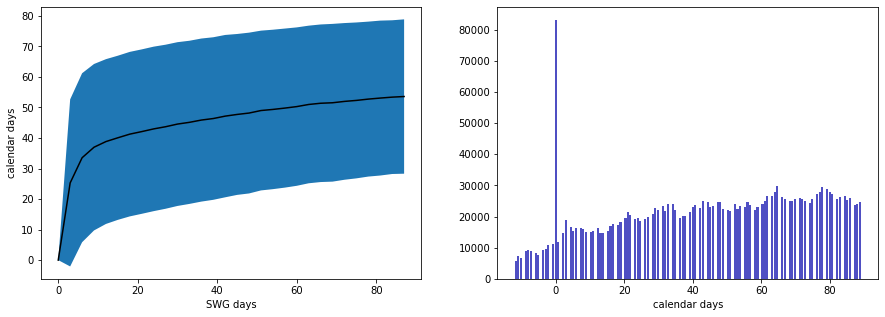

In [7]:
print(f'{np.max(np.diff(sec2days)) = }, {np.min(np.diff(sec2days)) = }')
import matplotlib.pyplot as plt
from pylab import rcParams
meansec2days = np.mean(sec2days.reshape(-1,sec2days.shape[2]),0)
stdsec2days = np.std(sec2days.reshape(-1,sec2days.shape[2]),0)
rcParams['figure.figsize'] = 15, 5
plt.subplot(121)
#plt.plot(sec2days.reshape(-1,sec2days.shape[2]).transpose()[:,:30])
plt.plot(extra_day*np.arange(len(meansec2days)),meansec2days,'k')
plt.fill_between(extra_day*np.arange(len(stdsec2days)),meansec2days-stdsec2days,meansec2days+stdsec2days)
plt.xlabel('SWG days')
plt.ylabel('calendar days')
plt.subplot(122)
n, bins, patches = plt.hist(sec2days.flatten(), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('calendar days')
#plt.plot((sec[10][10]%n_days-time_start).reshape(-1,n_days-time_start)[1,:])
#plt.plot((sec[10][10]%n_days-time_start).reshape(-1,n_days-time_start)[2,:])
plt.show()

## Preparing 100 years and 8000

In [8]:
time_series_tr_reshape = time_series_tr.reshape(-1,n_days)[:,(label_period_start-time_start):]
print(f'{time_series_tr_reshape.shape = }')
convseq = np.zeros(T*extra_day) # convolution to be used for running mean
convseq[range(0,T*extra_day,extra_day)] = 1/T
convseq = convseq[::-1]
print(f'{convseq = }')
A_tr = convolve_vec(time_series_tr_reshape,  convseq)
print(f'{np.mean([time_series_tr_reshape[33,33+3*i] for i in range(5)]) = }, {A_tr[33,33] = }')
time_series_tr_long = np.load(f'{folder_long}/fold_0/time_series_tr.npy')[:,0]
time_series_tr_reshape_long = time_series_tr_long.reshape(-1,n_days)[:,(label_period_start-time_start):]
print(f'{time_series_tr_reshape_long.shape = }')
convseq = np.zeros(T*extra_day) # convolution to be used for running mean
convseq[range(0,T*extra_day,extra_day)] = 1/T
convseq = convseq[::-1]
print(f'{convseq = }')
A_tr_long = convolve_vec(time_series_tr_reshape_long,  convseq)
print(f'{np.mean([time_series_tr_reshape_long[33,33+3*i] for i in range(5)]) = }, {A_tr_long[33,33] = }')

time_series_tr_reshape.shape = (90, 90)
convseq = array([0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0. ,
       0. , 0.2])
np.mean([time_series_tr_reshape[33,33+3*i] for i in range(5)]) = 0.105719306, A_tr[33,33] = 0.10571928024291988
time_series_tr_reshape_long.shape = (7200, 90)
convseq = array([0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0. ,
       0. , 0.2])
np.mean([time_series_tr_reshape_long[33,33+3*i] for i in range(5)]) = 4.100123, A_tr_long[33,33] = 4.100122857093812


In [9]:
time_series_tr.shape, time_series_tr_reshape.shape, A_tr.shape

((9450,), (90, 90), (90, 76))

## Comparing statistics real vs synthetic

A.shape = (90, 76), label = 'Real100'
A.shape = (7200, 76), label = 'Real8000'
A.shape = (90, 800, 26), label = 1
A.shape = (90, 800, 26), label = 5
A.shape = (90, 800, 26), label = 500


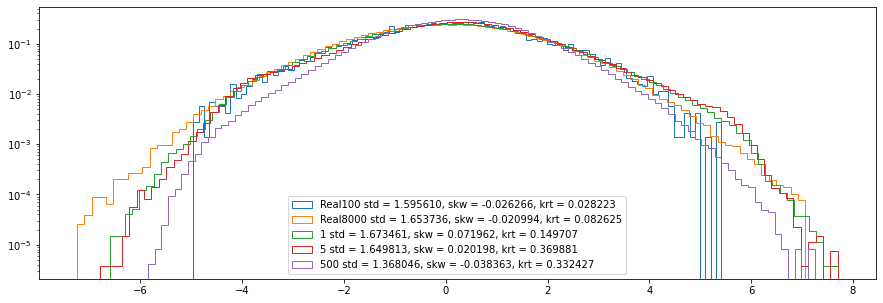

In [10]:
import scipy.stats as st
#coefs = (1,50,100) # alpha coefficients of interest
coefs = (1,5,500) # alpha coefficients of interest
nn = 10
for A, label in zip([A_tr,A_tr_long,*tuple([A_synth[coefsi][nn] for coefsi in coefs])],['Real100','Real8000', *coefs]):
    print(f'{A.shape = }, {label = }')
    flat_A = A.flatten()
    plt.hist(flat_A,bins=100,density=True,alpha=1, histtype='step', 
             label=f'{label} std = {np.std(flat_A):2f}, skw = {st.skew(flat_A):2f}, krt = {st.kurtosis(flat_A):2f}')
    plt.yscale('Log')
plt.legend(loc='lower center')
plt.savefig(f'{filename}_PDF.png')
plt.show()

In [11]:
time_series_tr.shape, time_series_synth[1][10].shape

((9450,), (90, 800, 30))

/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/ERA/ERA_Fields_New.py:775: RuntimeWarning: divide by zero encountered in log
  r1 = - 1/(np.log(1 - m/len(D_sorted))) # assumption of Poisson process


T = 2, Real100, xx_rt = [0.9967087591717273, 3.979079143367975, 9.491221581029905, 44.4981272777752, 89.49906889355451, 89.49906889355451]
T = 2,Real100, yy_rt = [3.1030441522598267, 4.634554386138916, 5.379493474960327, 6.57965612411499, 6.654566049575806, 6.654566049575806]
T = 2, Real8000, xx_rt = [1.0001011945072151, 3.9989569299821275, 10.002619141290367, 39.94735214501122, 99.49916247342207, 1028.0713475134585]
T = 2,Real8000, yy_rt = [3.031849503517151, 4.652390003204346, 5.471340656280518, 6.523920774459839, 7.067434072494507, 8.269295692443848]
T = 2, Synthetic, xx_rt = [0.9999879277172413, 4.000098049958176, 9.999548589903936, 39.99285444888213, 100.05782636753837, 999.4999166249727]
T = 2,Synthetic, yy_rt = [2.8890374898910522, 4.493443012237549, 5.513298988342285, 6.385699033737183, 6.689599514007568, 7.788141250610352]
T = 5, Real100, xx_rt = [0.9967087591717273, 3.979079143367975, 9.491221581029905, 44.4981272777752, 89.49906889355451, 89.49906889355451]
T = 5,Real100, yy

<Figure size 1800x1800 with 0 Axes>

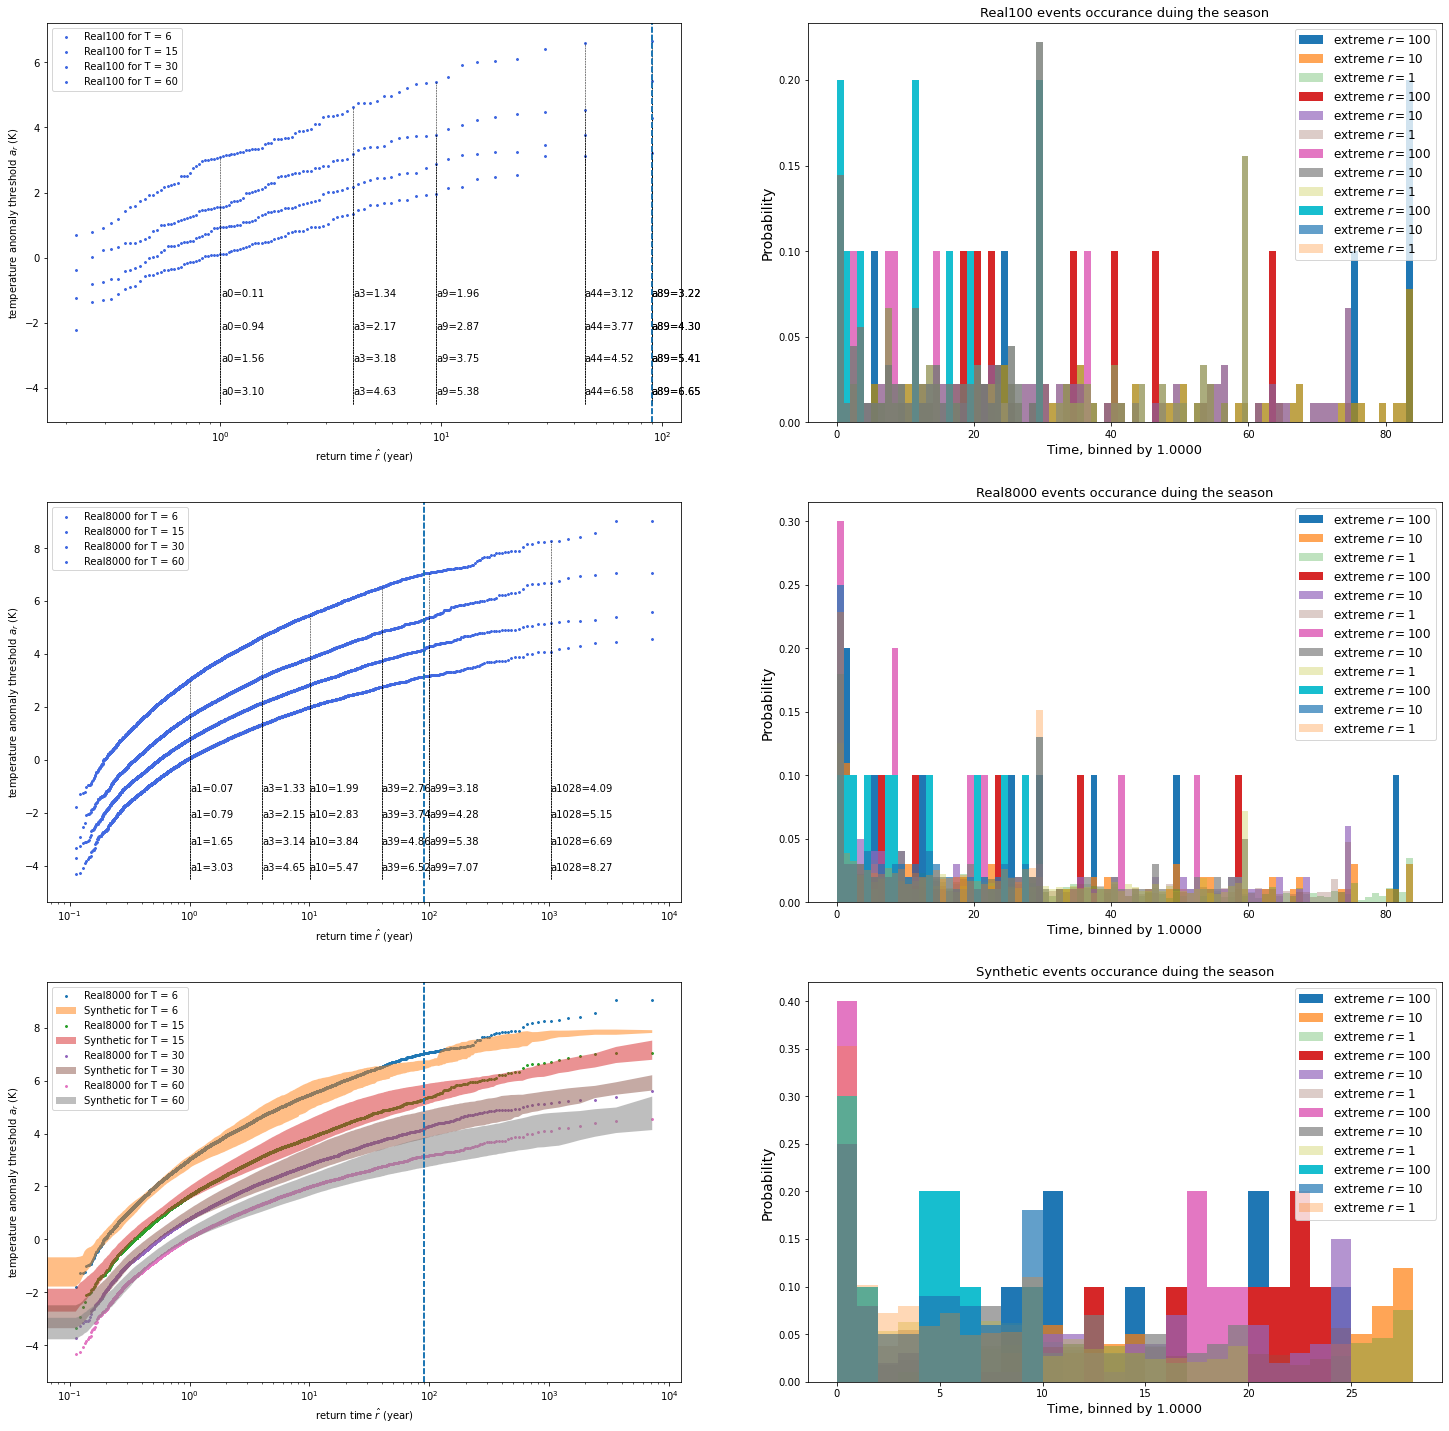

In [12]:

fig = plt.figure(figsize=(25, 25))
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(25,25))
A_max_sorted_dict = {}
for t, T in enumerate([2,5,10,20]):
    A_max_sorted_dict[T] = {}
    for j, (T_Summer, mylabel) in enumerate(zip([time_series_tr, time_series_tr_long, time_series_synth[1][10]],["Real100","Real8000","Synthetic"])):
        if mylabel == "Synthetic":
            A_Summer = convolve_vec(T_Summer,  np.ones(T)/T)
            A_Summer = A_Summer.reshape(-1,A_Summer.shape[2]) # collapse the dimensions 0 and 1, which correspond to 90 years of original data (starting in the same calendar day) and all the clones
        else:
            T_Summer_reshape = T_Summer.reshape(-1,n_days)[:,(label_period_start-time_start):]
            #print(f'{T_Summer_reshape.shape = }')
            convseq = np.zeros(T*extra_day) # convolution to be used for running mean
            convseq[range(0,T*extra_day,extra_day)] = 1/T
            convseq = convseq[::-1]
            #print(f'{convseq = }')
            A_Summer = convolve_vec(T_Summer_reshape,  convseq)
        #print(mylabel, f" {A_Summer.shape = }")
        #print(f'{j = }')
        ax1 = axs[j,0]
        #A_max, Ti, year_a = a_max_and_ti_postproc(A_Summer, A_Summer.shape[1])
        if mylabel == "Synthetic":
            ax1.scatter(XX_rt, YY_rt, s=4, marker='x',label=f"Real8000 for T = {T*extra_day}") 
            XX_rt_i, YY_rt_i = [], []
            #print(f'{A_Summer.shape[0] = }')
            for i in range(10):
                A_max_i = np.max(A_Summer[i*A_Summer.shape[0]//10:(i+1)*A_Summer.shape[0]//10],1)
                Ti_i = np.argmax(A_Summer[i*A_Summer.shape[0]//10:(i+1)*A_Summer.shape[0]//10],1)
                year_a_i = range(len(A_max_i))
                #print(f"{A_max_i.shape = },{Ti_i.shape = }, {len(year_a_i) = },{Ti_i.min() = }, {Ti_i.max() = }")
                A_max_sorted_i = ln.ef.a_decrese(A_max_i, Ti_i, year_a_i)
                
                XX_rt_item, YY_rt_item, _, _ = ln.ef.return_time_fix(A_max_sorted_i, modified='yes')
                #print(f'{len(XX_rt_item) = },{len(YY_rt_item) = }')
                XX_rt_i.append(XX_rt_item)
                YY_rt_i.append(YY_rt_item)
            XX_rt_i = np.array(XX_rt_i)
            YY_rt_i = np.array(YY_rt_i)
            mean_YY_rt_i = np.mean(YY_rt_i,0)
            std_YY_rt_i = np.std(YY_rt_i,0)
            ax1.fill_between(XX_rt_i[0],mean_YY_rt_i-std_YY_rt_i,mean_YY_rt_i+std_YY_rt_i,alpha=0.5,label=f'{mylabel} for T = {T*extra_day}')
        A_max = np.max(A_Summer,1)
        Ti = np.argmax(A_Summer,1)
        #print(f'{Ti = }')
        year_a = range(len(A_max))
        #print(f"{A_max.shape = },{Ti.shape = }, {len(year_a) = }")
        #print(f"{Ti.min() = }, {Ti.max() = }")
        A_max_sorted = ln.ef.a_decrese(A_max, Ti, year_a)
        A_max_sorted_dict[T][mylabel] = A_max_sorted
        XX_rt, YY_rt, xx_rt, yy_rt = ln.ef.return_time_fix(A_max_sorted, modified='yes')
        print(f"{T = }, {mylabel}, {xx_rt = }")
        print(f"{T = },{mylabel}, {yy_rt = }")
        
        
        if mylabel != "Synthetic":
            ax1.scatter(XX_rt, YY_rt, s=4, color='royalblue', marker='x',label=f'{mylabel} for T = {T*extra_day}')
            for i in range(len(xx_rt)):
                ax1.text(xx_rt[i] + 0.02, -4.2+t, f'a{int(xx_rt[i])}={yy_rt[i]:.2f}')
                ax1.plot([xx_rt[i], xx_rt[i]], [-4.5, yy_rt[i]], linestyle='--', color='black', linewidth=0.5)
 
 
        ax1.legend(loc="upper left")
        ax1.set_xscale('log')
        ax1.set_xlabel('return time $\hat{r}$ (year)')
        ax1.set_ylabel('temperature anomaly threshold $a_r$ (K)')
        ax1.axvline(analogues_tr.shape[0]//n_days,linestyle='--')
        #ax1.set_title(mylabel+' Temperature anomalies over '+ area, loc='left')
        Days = np.zeros(len(A_max_sorted))
        years = np.zeros(len(A_max_sorted))
        thresholds = np.zeros(len(A_max_sorted))
        for i, key in enumerate(A_max_sorted):
            thresholds[i] = key[0]
            years[i] = key[1][1]
            Days[i] = key[1][0]  
        
        Ax = axs[j,1]
        n, bins, patches = Ax.hist(Days[:10], bins = np.arange(0,A_Summer.shape[1]), density = True, alpha=1, label = 'extreme $r=100$')
        #print(f"{n = }")
        Ax.hist(Days[:100], bins = np.arange(0,A_Summer.shape[1]), density = True, alpha=0.7, label = 'extreme $r=10$')
        Ax.hist(Days[:1000], bins = np.arange(0,A_Summer.shape[1]), density = True, alpha=0.3, label = 'extreme $r=1$')
        Ax.set_xlabel('Time, binned by {:1.4f}'.format(bins[1]-bins[0]), fontsize=13)
        Ax.set_ylabel('Probability', fontsize=14)
        #Ax.set_ylim([0, 0.75*np.max(n)])
        Ax.set_title(mylabel+" events occurance duing the season", fontsize=13)
        Ax.legend(loc = 'best', fontsize=12)
plt.show()
for j, mylabel in zip(range(2),["Real","Synthetic"]):
    extent = ax1.get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f'{filename}_Returns.png', bbox_inches=extent )
T = 5

In [13]:
a,b,c,d = ln.ef.return_time_fix(A_max_sorted_dict[5]["Real8000"], modified='yes')
np.where(np.array(b)<5.414555454254151)[0][0]

66

In [14]:
a,b,c,d = ln.ef.return_time_fix(A_max_sorted_dict[5]["Synthetic"], modified='yes')
np.where(np.array(b)<5.414555454254151)[0][0]


1293

In [53]:

if (ut.keys_exists(run_vae_kwargs, 'label_period_start') and ut.keys_exists(run_vae_kwargs, 'label_period_end')):
    run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'myinput' : 'N', 'evaluate_epoch' :1, 'time_start' : time_start}) #, 'time_end' : time_end}) # it doesn't matter which checkpoint we choose since we do not need the output of the VAE
else:
    run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'myinput' : 'N', 'evaluate_epoch' :1}) # backward compatibiity where there was no month of may
if not os.path.exists(ut.extract_nested(run_vae_kwargs, 'mylocal')): # we are assuming that training was not run on R740server5
    run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'mylocal' : '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/'})
run_vae_kwargs = ut.set_values_recursive(run_vae_kwargs, {'range_nfolds' : [foldnum],'normalization_mode' : 'None', 'lon_start' : -64, 'lon_end' : 64})
logger.info(f"{Fore.BLUE}") #  indicates we are inside the routine  
history, N_EPOCHS, INITIAL_EPOCH, checkpoint_path, LAT, LON, vae, X_va, Y_va, X_tr, Y_tr, _ = foo.run_vae(folder, **run_vae_kwargs)
logger.info(f"{Style.RESET_ALL}")
X_tr_reshaped = X_tr.reshape(-1,n_days,*X_tr.shape[1:])[:,(label_period_start-time_start):,...]


run_vae:
    myinput = 'N'
     inputs lat_W = 24, lon_W = 128
    encoder_conv_filters1 = 32, encoder_conv_kernel_size1 = 3, encoder_conv_strides1 = 2, encoder_conv_padding1 = 'same'
     processing layer results in the dimension lat_W = 12.0, lon_W = 64.0
    encoder_conv_filters1 = 64, encoder_conv_kernel_size1 = 3, encoder_conv_strides1 = 2, encoder_conv_padding1 = 'same'
     processing layer results in the dimension lat_W = 6.0, lon_W = 32.0
    encoder_conv_filters1 = 64, encoder_conv_kernel_size1 = 3, encoder_conv_strides1 = 2, encoder_conv_padding1 = 'same'
     processing layer results in the dimension lat_W = 3.0, lon_W = 16.0
    encoder_conv_filters1 = 64, encoder_conv_kernel_size1 = 3, encoder_conv_strides1 = 1, encoder_conv_padding1 = 'valid'
     processing layer results in the dimension lat_W = 1.0, lon_W = 14.0
    decoder_conv_filters1 = 64, decoder_conv_kernel_size1 = 3, decoder_conv_strides1 = 1, decoder_conv_padding1 = 'valid'
     processing layer results in the

# Composite maps

Below we will compute different composite maps. First from the original 90 year training set. We will extract the most extreme heatwave and study it

In [87]:
for t, T in enumerate([5]):
    for j, (T_Summer, mylabel) in enumerate(zip([time_series_tr],["Real100"])):
        
        T_Summer_reshape = T_Summer.reshape(-1,n_days)[:,(label_period_start-time_start):]
        print(f'{T_Summer_reshape.shape = }')
        convseq = np.zeros(T*extra_day) # convolution to be used for running mean
        convseq[range(0,T*extra_day,extra_day)] = 1/T
        convseq = convseq[::-1]
        print(f'{convseq = }')
        A_Summer = convolve_vec(T_Summer_reshape,  convseq)
        print(mylabel, f" {A_Summer.shape = }")
        print(f'{j = }')
        #A_max, Ti, year_a = a_max_and_ti_postproc(A_Summer, A_Summer.shape[1])
        A_max = np.max(A_Summer,1)
        Ti = np.argmax(A_Summer,1)
        #print(f'{Ti = }')
        year_a = range(len(A_max))
        print(f"{A_max.shape = },{Ti.shape = }, {len(year_a) = }")
        print(f"{Ti.min() = }, {Ti.max() = }")
        A_max_sorted = ln.ef.a_decrese(A_max, Ti, year_a)

A_max_sorted[:10]

T_Summer_reshape.shape = (90, 90)
convseq = array([0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0. ,
       0. , 0.2])
Real100  A_Summer.shape = (90, 76)
j = 0
A_max.shape = (90,),Ti.shape = (90,), len(year_a) = 90
Ti.min() = 0, Ti.max() = 75


[(5.414555454254151, [8, 80]),
 (4.522509145736695, [0, 2]),
 (4.473068094253541, [3, 11]),
 (4.396921873092651, [22, 20]),
 (4.332517671585084, [20, 70]),
 (4.219875049591065, [46, 40]),
 (4.0784080028533936, [18, 51]),
 (3.9364336967468265, [63, 60]),
 (3.752542018890381, [34, 50]),
 (3.7328102111816404, [40, 31])]

### The most extreme heatwave in 90 year long dataset at $\tau=0$

In [88]:
import importlib as imp
imp.reload(cplt)

<module 'cartopy_plots' from '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/VAE/../ERA/cartopy_plots.py'>

extreme_X[0].shape = (24, 128, 1), A_max_sorted[:i_sorted] = [(5.414555454254151, [8, 80])]
norm = <matplotlib.colors.TwoSlopeNorm object at 0x7ef39dc3bee0>


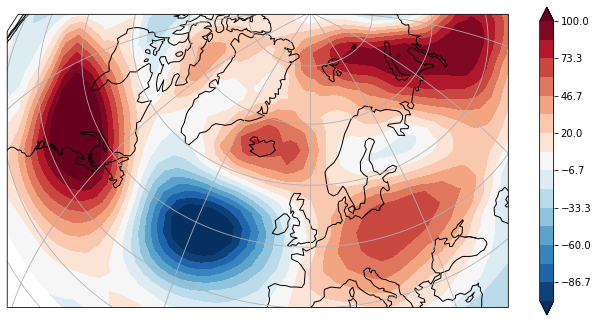

In [89]:
i_sorted = 1
extreme_X = [X_tr_reshaped[value[1][1],value[1][0],...,1:2] for value in A_max_sorted[:i_sorted]]
print(f'{extreme_X[0].shape = }, {A_max_sorted[:i_sorted] = }')
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot(LON, LAT, np.mean(extreme_X,0),projections=[ccrs.Orthographic(0, 55)],
                         fig_num=8, put_colorbar=True, levs=np.linspace(-100,100,16), use_norm=False,
                         extents=(-100, 40, 30, 60), shrink=0.75, figure=fig,
                         mode='contourf',draw_labels=False,draw_gridlines=True
                        )
fig.savefig('Images/teleconnection100.png', bbox_inches="tight", dpi=200)


This is just (3-day interpolated) single day snapshot. So it is less informative. 

extreme_X[0][0].shape = (128, 1), A_max_sorted[:i_sorted] = [(5.414555454254151, [8, 80])]
norm = <matplotlib.colors.TwoSlopeNorm object at 0x7ef39dc3b160>


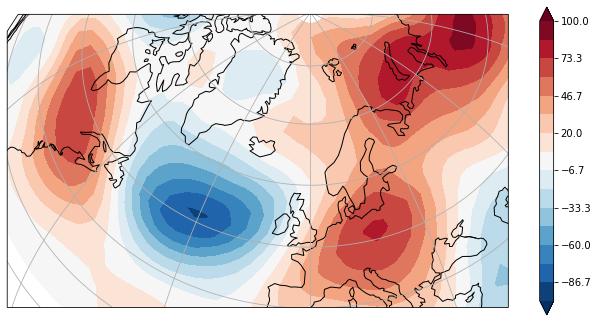

In [90]:
i_sorted = 1
extreme_X = [X_tr_reshaped[value[1][1],value[1][0]+next_day,...,1:2] for next_day in range(-9,9,3) for value in A_max_sorted[:i_sorted]]
print(f'{extreme_X[0][0].shape = }, {A_max_sorted[:i_sorted] = }')
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot(LON, LAT, np.mean(extreme_X,0),projections=[ccrs.Orthographic(0, 55)],
                         fig_num=8, put_colorbar=True, levs=np.linspace(-100,100,16), use_norm=False,
                         extents=(-100, 40, 30, 60), shrink=0.75, figure=fig,
                         mode='contourf',draw_labels=False,draw_gridlines=True
                        )
fig.savefig('Images/mean_teleconnection100.png', bbox_inches="tight", dpi=200)

## Compute extremes of synthetic series

In [91]:
for t, T in enumerate([5]):
    for j, (T_Summer, sec_Summer, mylabel) in enumerate(zip([time_series_synth[500][10]],[sec[500][10]],["Synthetic"])):
        
        A_Summer = convolve_vec(T_Summer,  np.ones(T)/T)
        A_Summer = A_Summer.reshape(-1,A_Summer.shape[2])
        sec_Summer_reshaped = sec_Summer.reshape(-1,sec_Summer.shape[2])
        print(mylabel, f" {A_Summer.shape = }")
        print(f'{j = }')
        #A_max, Ti, year_a = a_max_and_ti_postproc(A_Summer, A_Summer.shape[1])
        A_max = np.max(A_Summer,1)
        Ti = np.argmax(A_Summer,1)
        #print(f'{Ti = }')
        year_a = range(len(A_max))
        print(f"{A_max.shape = },{Ti.shape = }, {len(year_a) = }")
        print(f"{Ti.min() = }, {Ti.max() = }")
        A_max_sorted = ln.ef.a_decrese(A_max, Ti, year_a)
a,b,c,d = ln.ef.return_time_fix(A_max_sorted, modified='yes')
i_sorted = np.where(np.array(b)<5.414555454254151)[0][0]
print(f'{i_sorted = }')

Synthetic  A_Summer.shape = (72000, 26)
j = 0
A_max.shape = (72000,),Ti.shape = (72000,), len(year_a) = 72000
Ti.min() = 0, Ti.max() = 25
i_sorted = 214


extreme_X[0].shape = (24, 128, 1), A_max_sorted[i_sorted] = (5.41409707069397, [0, 64478])
norm = <matplotlib.colors.TwoSlopeNorm object at 0x7ef39c3c9e80>


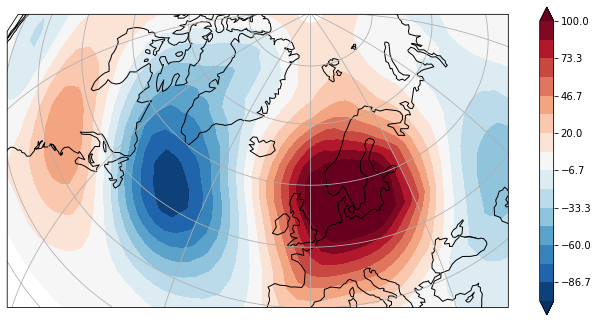

In [92]:


extreme_X = [X_tr[sec_Summer_reshaped[value[1][1],value[1][0]],...,1:2] for value in A_max_sorted[:i_sorted]]
print(f'{extreme_X[0].shape = }, {A_max_sorted[i_sorted] = }')

fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot(LON, LAT, np.mean(extreme_X,0),projections=[ccrs.Orthographic(0, 55)],
                         fig_num=8, put_colorbar=True, levs=np.linspace(-100,100,16), use_norm=False,
                         extents=(-100, 40, 30, 60), shrink=0.75, figure=fig,
                         mode='contourf',draw_labels=False,draw_gridlines=True
                        )
fig.savefig('Images/teleconnection_synthetic.png', bbox_inches="tight", dpi=200)


extreme_X[0].shape = (24, 128, 1), A_max_sorted[i_sorted] = (6.096914291381836, [12, 45423])
norm = <matplotlib.colors.TwoSlopeNorm object at 0x7ef42c18b430>


<GeoAxesSubplot:>

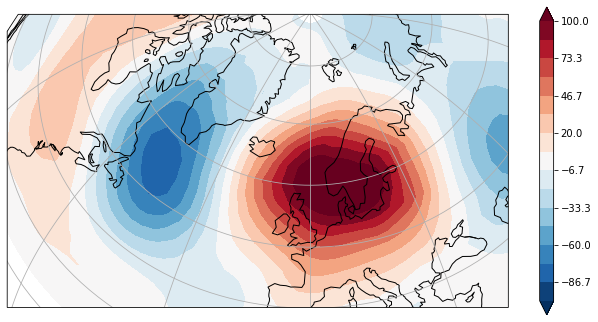

In [79]:
i_sorted = 30

extreme_X = [X_tr[sec_Summer_reshaped[value[1][1],value[1][0]+next_day],...,1:2] for next_day in range(-3,3,1) for value in A_max_sorted[:i_sorted]]
print(f'{extreme_X[0].shape = }, {A_max_sorted[i_sorted] = }')

cplt.multiple_field_plot(LON, LAT, np.mean(extreme_X,0),projections=[ccrs.Orthographic(0, 55)],
                         fig_num=8, put_colorbar=True, levs=np.linspace(-100,100,16), use_norm=False,
                         extents=(-100, 40, 30, 60), shrink=0.75,
                         mode='contourf',draw_labels=False,draw_gridlines=True
                        )
